# Smart Image Sorter 🖼️📁

<a href="https://www.bellingcat.com"><img alt="Bellingcat logo: Discover Bellingcat" src="https://img.shields.io/badge/Discover%20Bellingcat-%20?style=for-the-badge&logo=data%3Aimage%2Fpng%3Bbase64%2CiVBORw0KGgoAAAANSUhEUgAAAA4AAAAYCAYAAADKx8xXAAABhGlDQ1BJQ0MgcHJvZmlsZQAAKJF9kT1Iw0AcxV9TS0UqDnZQEcxQneyiIo6likWwUNoKrTqYXPoFTRqSFBdHwbXg4Mdi1cHFWVcHV0EQ%2FABxdnBSdJES%2F5cUWsR4cNyPd%2Fced%2B8AoVllqtkTA1TNMtKJuJjLr4rBVwQwhhBEDEvM1JOZxSw8x9c9fHy9i%2FIs73N%2Fjn6lYDLAJxLHmG5YxBvEs5uWznmfOMzKkkJ8Tjxp0AWJH7kuu%2FzGueSwwDPDRjY9TxwmFktdLHcxKxsq8QxxRFE1yhdyLiuctzir1Tpr35O%2FMFTQVjJcpzmKBJaQRIo6klFHBVVYiNKqkWIiTftxD%2F%2BI40%2BRSyZXBYwcC6hBheT4wf%2Fgd7dmcXrKTQrFgcCLbX%2BMA8FdoNWw7e9j226dAP5n4Err%2BGtNYO6T9EZHixwBA9vAxXVHk%2FeAyx1g6EmXDMmR%2FDSFYhF4P6NvygODt0Dfmttbex%2BnD0CWulq%2BAQ4OgYkSZa97vLu3u7d%2Fz7T7%2BwHEU3LHAa%2FQ6gAAAAZiS0dEAAAAAAAA%2BUO7fwAAAAlwSFlzAAAuIwAALiMBeKU%2FdgAAAAd0SU1FB%2BgFHwwiMH4odB4AAAAZdEVYdENvbW1lbnQAQ3JlYXRlZCB3aXRoIEdJTVBXgQ4XAAAA50lEQVQ4y82SvWpCQRCFz25ERSJiCNqlUiS1b5AuEEiZIq1NOsGXCKms0wXSp9T6dskDiFikyiPc%2FrMZyf3FXSGQ0%2BzuzPl2ZoeVKgQ0gQ2wBVpVHlcDkjM5V%2FJ5nag6sJ%2FZX%2Bh%2FC7gEhqeAFKf7p1M9aB3b5oN1OomB7g1axUBPBr3GQHODHmOgqUF3MZAzKI2d4LWBV4H%2BMXDuJd1a7Cew1k7SwksaHC4LqNaw7aeX9GWHXkC1G1sTAS17Y3Kk2lnp4wNLiz0DrgLq8qt2MfmSSabAO%2FBBXp26dtrADPjOmN%2BAUdG7B3cE61l5hOZiAAAAAElFTkSuQmCC&logoColor=%23fff&color=%23000"></a><!--
--><a href="https://discord.gg/bellingcat"><img alt="Discord logo: Join our community" src="https://img.shields.io/badge/Join%20our%20community-%20?style=for-the-badge&logo=discord&logoColor=%23fff&color=%235865F2"></a><!--
--><a href="https://www.bellingcat.com/resources/how-tos/2024/08/15/easy-ai-zero-shot-ai-image-classification-smart-image-sorter/"><img alt="Book icon: read the article" src="https://img.shields.io/badge/Explore%20the%20guide-%20?style=for-the-badge&logo=ReadMe&logoColor=fff&color=C41E3D"></a>

The Smart Image Sorter organises images into folders based on the classification results of an open-source AI model. The tool creates a subdirectory for each label and organises the images according to the label with the highest confidence score.

This tool was developed by Adriano Belisario as part of the Bellingcat Tech Fellowship.

<details>
<summary>Click here to learn more about the settings you can configure. 💡</summary>

**Mount Google Drive**

If you are running this notebook using Google Colab, we recommend you click on this button.

By default, Google Colab files are temporary, meaning they disappear when your session ends, either after a certain amount of time without any activity, or if you leave this page. Clicking on this button allows you to use your own images from Google Drive and save the sorted images easily.

You may ignore this button if you are running this notebook locally.

**Source**

The path to the folder with the images to be classified. In Google Colab, you can use the file manager in the left menu (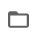) to get the path of your image folder. Right-click the folder, select "Copy path" and paste the directory below. The directories will be created if they do not exist.

**Destination**

The folder to which the images should be copied or moved after the classification. The code also generates an `output.csv` file in the destination folder, containing a table with all the filenames, labels and confidence score. If you are running this notebook using Google Colab, we recommend that you mount your Google Drive and use a destination file path from there to ensure your output is saved beyond your Google Colab session.

**Model**

The name of the zero-shot image classification model on HuggingFace that will be used.

The default option is the most downloaded zero-shot image classification model on HuggingFace. [Check out other models available](https://huggingface.co/models?pipeline_tag=zero-shot-image-classification&sort=downloads).

If you want to geolocate images, try **StreetCLIP** ([`geolocal/StreetCLIP`](https://huggingface.co/geolocal/StreetCLIP)) and use countries, regions, or cities as candidate labels.

**Labels**

A comma-separated list of categories that the model will use for classification. Short, descriptive labels in English tend to work the best in most cases: e.g. "a picture of a person" rather than "people". The model will always assign one (and only one) of the labels to the image, even if none of them are appropriate, so your labels should be as comprehensive as possible and should not overlap.

**Operation**

Define if the tool should copy or move the images from the source to the destination folder when sorting them. “Copy” ensures that you retain the original unsorted images, while “move” may be more efficient if you are concerned about storage space.

</details>

In [ ]:
#@title Set up the parameters below

# @markdown ### ⬅️ Click to load the tool

from IPython.display import clear_output
import time
import os, sys, time
import ipywidgets as widgets
from IPython.display import display
import warnings

warnings.filterwarnings('ignore')

def is_running_in_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

def clone_repository(repository_url, directory):
    import subprocess
    result = subprocess.run(["git", "clone", repository_url, directory], capture_output=True, text=True)
    if result.returncode != 0:
        print(f"\x1b[31m There was an error while loading the tool: {result.stderr}\x1b[0m")


def create_mount_google_drive_button():
    # Create mount Google Drive button
    mount_button = widgets.Button(
                description='Mount Google Drive',
                disabled=False,
                button_style='success',
                tooltip='Click to mount Google Drive',
                icon='upload'
            )

    def on_mount_drive(b):
        from google.colab import drive
        GDRIVE_PATH = "/content/drive/"
        drive.mount(GDRIVE_PATH)
        print(f"Google Drive mounted at {GDRIVE_PATH}")

    mount_button.on_click(on_mount_drive)
    return mount_button


def setup_notebook(gh_name, repo_name):
    if is_running_in_colab():
        # Check for GPU
        if (os.environ.get("COLAB_GPU")==''):
            print("\x1b[33m It looks like there isn't a GPU available, which could make the tool run very slowly. Try selecting a runtime with a GPU (Runtime > Change runtime type). \x1b[0m")

        # Clone Repo
        repo_url = f"https://github.com/{gh_name}/{repo_name}.git"

        if not os.path.exists(repo_name):
            clone_repository(repo_url, repo_name)

        repo_path = os.path.abspath(repo_name)

        if repo_path not in sys.path:
            sys.path.append(repo_path)

setup_notebook("bellingcat", "smart-image-sorter")

# GUI

from utils.file_manager import setup_directories, list_images
from utils.model import list_models, classify_images

mount_button = create_mount_google_drive_button()

all_models = list_models()

labels_input = widgets.Text(
    value="screenshot of a newspaper article, a picture of a person, a picture of a politician, memes and computer-generated images",
    placeholder='Enter comma-separated labels',
    description='Labels:',
    layout=widgets.Layout(width='50%'),
    disabled=False
)

source_input = widgets.Text(
    value="/content/smart-image-sorter/imgs",
    placeholder='Enter source directory path',
    description='Source:',
    layout=widgets.Layout(width='50%'),
    disabled=False
)

destination_input = widgets.Text(
    value="labelled/",
    placeholder='Enter destination directory path',
    description='Destination:',
    layout=widgets.Layout(width='50%'),
    disabled=False
)

model_input = widgets.Combobox(
    value=all_models[0],
    placeholder="Select or type model name",
    options=all_models,
    description='Model:',
    ensure_option=True,
    disabled=False
)

operation_input = widgets.Dropdown(
    options=['copy', 'move'],
    value='copy',
    description='Operation:',
    disabled=False,
)

start_classification_button = widgets.Button(
    description='Start Classification',
    disabled=False,
    button_style='success',
    tooltip='Click to start image classification',
    icon='play'
)

def on_start_classification(b):
    clear_output()
    display(source_input,destination_input,model_input,labels_input, operation_input,start_classification_button)
    start_time = time.time()
    source = source_input.value
    destination = destination_input.value
    setup_directories(source, destination)
    labels = labels_input.value.split(',')
    labels = [label.strip() for label in labels]
    num_labels = len(labels)
    if num_labels < 2:
      print(f"\x1b[31m Please select two or more labels.\x1b[0m")
    else:
      print(f"Labels: {labels}")
      print(f"Source directory: {source}")
      print(f"Destination directory: {destination}")
      print(f"Starting classification...")
      images = list_images(source)
      classify_images(images, destination, model_input.value, labels, operation_input.value)
      print(f"Classification finished")
      end_time = time.time()
      elapsed_time = round(end_time - start_time)
      print(f"Elapsed time: {elapsed_time} seconds")

start_classification_button.on_click(on_start_classification)

if is_running_in_colab():
    display(mount_button)

display(source_input,destination_input,model_input,labels_input, operation_input,start_classification_button)


Button(button_style='success', description='Mount Google Drive', icon='upload', style=ButtonStyle(), tooltip='…

Text(value='/content/smart-image-sorter/imgs', description='Source:', layout=Layout(width='50%'), placeholder=…

Text(value='labelled/', description='Destination:', layout=Layout(width='50%'), placeholder='Enter destination…

Combobox(value='openai/clip-vit-large-patch14', description='Model:', ensure_option=True, options=('openai/cli…

Text(value='screenshot of a newspaper article, a picture of a person, a picture of a politician, memes and com…

Dropdown(description='Operation:', options=('copy', 'move'), value='copy')

Button(button_style='success', description='Start Classification', icon='play', style=ButtonStyle(), tooltip='…

Mounted at /content/drive/
Google Drive mounted at /content/drive/


# Variáveis de controle

In [ ]:
GET_AMOSTRA = False # Sorteia um conjunto de amostra com o nome das fotos
GET_IDS = False # Pega da API do Drive os ids das fotos
DEEPSEEK = False # Comunica com API da DeepSeek
OPENAI = False # Comunica com API da Open AI
GET_MAP = False # Recupera mapa com o nome da foto e seu id
GET_SUMMARY = False # Resume etiquetas
CLASSIFY_LLM = False # Classifica imagens usando LLM da Open AI
GET_MODELS = False # Seleciona modelos aleatoriamente
GET_LABELS = False # Recupera etiquetas encontradas pela LLM
CLASSIFY_CLIP = False # Classifica imagens usando os modelos selecionados
GET_METRICS = False # Calcula as métricas de cada modelo
CREATE_METRICS = False # Calcular as métricas
CREATE_GRAPH = True # Gerar gráfico

# Ler pasta com fotos

In [ ]:
# Pasta em que se encontram as fotos
pasta = '/content/drive/MyDrive/TCC/'
pasta_resultados = pasta[:-4] + 'Resultados/'
os.makedirs(pasta_resultados, exist_ok=True)
print(pasta, pasta_resultados)

/content/drive/MyDrive/TCC/ /content/drive/MyDrive/Resultados/


In [ ]:
# Listar arquivos que encontrou na pasta
import os
Fts = os.listdir(pasta)
print("Foram encontradas ", len(Fts), " fotos.")

Foram encontradas  1122  fotos.


Em testes preliminares com a ferramenta, notou-se que arquivos iniciados com "." não eram encontrados.

Dessa forma, se torna necessário renomear tais arquivos, retirando o caractere "." do ínicio de seu nome.

In [ ]:
# Renomeando as fotos do drive que começam com ' . '
for f in Fts:
  if f.startswith("."):
    os.rename(pasta + f, pasta + f.replace(".",""))

# Selecionar amostra do conjunto de fotos

Executar 4 iterações de seleção aleatória de 5% do conjunto principal.

In [ ]:
import random

if GET_AMOSTRA:
  Amostras = []
  tamanho_amostra = round((5/100)*len(Fts)) # 5% das fotos.
  Iteracoes = 4 # 4 vezes.

  for i in range(Iteracoes):

    indices_amostra = random.sample(range(len(Fts)), tamanho_amostra) # Sorteando números de forma aleatória.
    indices_amostra = [Fts[i] for i in indices_amostra] # Seleciona as imagens correspondentes aos números sorteados.
    Amostras.append(indices_amostra) # Insere na lista as imagens sorteadas.

  with open(f"{pasta_resultados}amostras.json", "w") as arquivo:
    json.dump(Amostras, arquivo, indent=4)

  print("Índices da amostra:", Amostras)

Índices da amostra: [['PXL_20230606_155701717.MP.jpg', 'PXL_20230607_162243873.MP.jpg', 'photo_1252@07-06-2023_21-40-43_thumb.jpg', 'photo_2626@21-08-2024_17-42-53.jpg', 'photo_2589@11-08-2024_18-45-38_thumb.jpg', 'photo_1257@08-06-2023_19-22-33_thumb.jpg', 'photo_2617@19-08-2024_16-47-52.jpg', 'PXL_20230607_164717379.jpg', 'PXL_20230606_150130750.jpg', 'PXL_20230619_202334248.jpg', 'photo_1213@24-05-2023_14-36-42.jpg', 'trashed-1741649887-PXL_20250208_233800604jpg.jpg', 'photo_3209@22-01-2025_18-09-35.jpg', 'photo_1217@25-05-2023_11-27-21.jpg', 'photo_1309@26-06-2023_17-22-19_thumb.jpg', 'photo_1288@19-06-2023_09-16-38_thumb.jpg', 'photo_1262@13-06-2023_11-39-41.jpg', 'photo_1341@10-07-2023_14-31-45_thumb.jpg', 'PXL_20230620_031016332.jpg', 'photo_2624@21-08-2024_17-42-53_thumb.jpg', 'photo_1067@03-02-2023_20-57-32_thumb.jpg', 'PXL_20230606_151320151.jpg', 'PXL_20230619_140402285.jpg', 'photo_1343@10-07-2023_18-05-03.jpg', 'photo_3175@10-01-2025_13-20-19_thumb.jpg', 'photo_3271@05-02-

In [ ]:
if GET_AMOSTRA:
  Amostras_lista = [elemento for amostra in Amostras for elemento in amostra]
  Amostras_conjunto = set(Amostras_lista)
  len(Amostras_conjunto)

205

# Recuperar ids das fotos pela API do Drive

Código para extrair do Drive os ids de cada foto, através da API.

Executado apenas uma vez para não gerar custos e mapear as fotos e seus ids em um arquivo.

In [ ]:
from googleapiclient.discovery import build
from google.oauth2 import service_account
import json

if GET_IDS:
  # Configuração da API
  SCOPES = ['https://www.googleapis.com/auth/drive.readonly']
  SERVICE_ACCOUNT_FILE = "/content/tcc-acesso-drive-4578135a9e12.json"

  credentials = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
  service = build('drive', 'v3', credentials=credentials)
  folder_id = "1QwXgKwwUm-hKpuzmXdOBWmz3XfOdiSV_"

  all_files = []
  page_token = None

  while True:
      # Requisição com paginação
      results = service.files().list(
          q=f"'{folder_id}' in parents",
          fields="nextPageToken, files(id, name)",
          pageSize=1000,  # Máximo permitido por requisição
          pageToken=page_token
      ).execute()

      all_files.extend(results.get('files', []))
      page_token = results.get('nextPageToken')

      if not page_token:
          break  # Sai do loop quando não houver mais páginas

  print(f"Total de arquivos encontrados: {len(all_files)}")

  # Mapeia nome_arquivo → ID
  mapeamento_drive = {arquivo['name']: arquivo['id'] for arquivo in all_files}

  json_object = json.dumps(mapeamento_drive, indent=4)

  with open(f"{pasta_resultados}mapeamento_drive.json", "w") as arquivo:
      arquivo.write(json_object)

# Chamar modelo de LLM para encontrar etiquetas

Importar blibioteca do modelo, criar um prompt, chamar o modelo para prever as etiquetas e resumi-las em uma lista final. Cronometrar tempo de execução.

### Deepseek

In [ ]:
from openai import OpenAI
import sys

from google.colab import userdata
DEEPSEEK_API = userdata.get('DEEPSEEK_API')

BASE_URL = "https://api.deepseek.com"

In [ ]:
def describe_image(image_url, prompt):
    """
    Function to classify an image using DeepSeek API
    """
    try:
        # Initialize the OpenAI client with DeepSeek's API
        client = OpenAI(api_key=DEEPSEEK_API, base_url=BASE_URL)

        # Create the chat completion request
        response = client.chat.completions.create(
            model="deepseek-chat",
            messages=[
                {"role": "system", "content": "Você é um assistente que descreve imagens e as analisa."},
                {"role": "user", "content": f"{prompt}: {image_url}"}
            ],
            stream=False
        )

        # Return the classification
        return response.choices[0].message.content

    except Exception as e:
        print(f"Error calling DeepSeek API: {str(e)}")
        return None

In [ ]:
if DEEPSEEK:

  describe_image("https://drive.google.com/uc?export=view&id=13NCOlxwH542wK1taBd0opUDoIc5-Cpi0",
                """Verifique a imagem e liste os possíveis
                problemas nela. Os problemas podem ser desfoque, foco de luz, ângulo ruim,
                imagem embaçada, resolução baixa, print de tela, enquadramento ruim, contraste ruim, sem nitidez.
                Retorne apenas os erros encontrados, sem mais detalhes, em formato de lista.
                Exemplo: [erro1, erro2,...]. Caso nenhum erro for encontrado, retorne uma lista vazia.
                Identifique também objetos presentes na imagem, descrevendo-as em poucas palavras.
                Exemplo: se a imagem é de uma fazenda, escreva paisagem; se é de um carro, carro.
                Retorne uma lista de erros e outra de etiquetas. Os problemas só devem aparecer na lista de erros. """)

'[desfoque, imagem embaçada, sem nitidez]  \n[paisagem]'

 ### Chat GPT


In [ ]:
from openai import OpenAI
from google.colab import userdata
import sys
import json


def describe_image(image_url, prompt):
    """
    Function to classify an image using OpenAI API
    """
    try:
        # Initialize the OpenAI client with OpenAI API
        OpenAI_API = userdata.get('OpenAI_API')
        client = OpenAI(api_key=OpenAI_API)

        # Create the chat completion request
        response = client.responses.create(
          model="gpt-4.1",
          input=[
              {
                  "role": "user",
                  "content": [
                      { "type": "input_text", "text": prompt },
                      { "type": "input_image", "image_url": image_url}
                  ]
              }
          ])

        # Return the classification
        return json.loads(response.output[0].content[0].text)

    except Exception as e:
        print(f"Error calling OpenAI API: {str(e)}")
        return None

In [ ]:
prompt = """Verifique a imagem e liste os possíveis problemas nela. Os problemas podem ser desfoque, foco de luz, ângulo ruim,
    imagem embaçada, resolução baixa, enquadramento ruim, contraste ruim, sem nitidez.
    Um print de tela também deve ser considerado problema. Monte uma lista contendo apenas os erros encontrados, sem mais detalhes.
    Exemplo: [erro1, erro2,...]. Caso nenhum erro for encontrado, monte uma lista vazia.

    Identifique também objetos presentes na imagem, descrevendo-as em poucas palavras.
    Exemplo: se a imagem é de uma fazenda ou ponto turístico, escreva paisagem; se é de um carro, carro;
    se contém gato ou cachorro, escreva animal, etc. Monte uma lista contendo apenas os objetos encontrados, sem mais detalhes.
    Exemplo: [objeto1, objeto2,...]. Caso nenhum objeto seja encontrado, monte uma lista vazia.

    Retorne somente um json formado pelas duas listas: uma de erros e outra de etiquetas.
    Os problemas só devem aparecer na lista de erros. Não escreva nada além do json."""

if OPENAI:

  response = describe_image("https://drive.google.com/uc?export=view&id=183ObXUzBBgdmvwRJtybQ9joUrZt3pU4Z", prompt)
  print(response)

{'erros': ['print de tela', 'resolução baixa'], 'etiquetas': ['texto']}


In [ ]:
from datetime import datetime
import json

if GET_MAP:
  with open(f"{pasta_resultados}mapeamento_drive.json") as arquivo:
    mapeamento_drive = json.load(arquivo)
    print("Total de fotos: ",len(mapeamento_drive))

  c = 0
  Resultados_erros_labels = {}
  now = datetime.now()
  for nome_foto, id_drive in mapeamento_drive.items():
    if nome_foto in Amostras_conjunto:
      c += 1
      Resultados_erros_labels[nome_foto] = describe_image("https://drive.google.com/uc?export=view&id=" + id_drive, prompt)

  print("Amostras testadas: ", c)


  now2 = datetime.now()

  print("Início: ", now.strftime("%Y-%m-%d %H:%M:%S"),
        "\nFim: ", now2.strftime("%Y-%m-%d %H:%M:%S"),
        "\nTempo de execução: ", now2-now)

  json_object = json.dumps(Resultados_erros_labels, indent=4, ensure_ascii=False)

  with open(f"{pasta_resultados}labels e erros das amostras.json", "w", encoding="utf-8") as arquivo:
    arquivo.write(json_object)

Total de fotos:  1122
Error calling OpenAI API: Error code: 500 - {'error': {'message': 'An error occurred while processing your request. You can retry your request, or contact us through our help center at help.openai.com if the error persists. Please include the request ID req_eca8b7d82d1dc67e45af91791c66dabe in your message.', 'type': 'server_error', 'param': None, 'code': 'server_error'}}
Amostras testadas:  202
Início:  2025-05-08 20:14:29 
Fim:  2025-05-08 20:46:27 
Tempo de execução:  0:31:58.501459


# Resumir etiquetas


In [ ]:
from openai import OpenAI
from google.colab import userdata
import sys

def find_labels(prompt):

    try:
        # Initialize the OpenAI client with OpenAI API
        OpenAI_API = userdata.get('OpenAI_API')
        client = OpenAI(api_key=OpenAI_API)

        # Create the chat completion request

        response = client.responses.create(
          model="gpt-4.1",
          input=[

              {
                "role": "system",
                "content": [
                  {"type": "input_text", "text": """Você é um assistente que
                resume rótulos com nomes mais simples. Evite ambiguidades.
                Não use nomes que tenham o mesmo significado ou que sejam muito semelhantes.
                Verifique sua resposta e certifique-se de que esteja correta
                e clara. Você precisa garantir que a resposta não seja ambigua.""" }]
              },
              {
                "role": "user",
                "content": [
                  {"type": "input_text", "text": prompt }]
              }
          ])

        # Return the classification

        return response.output[0].content[0].text


    except Exception as e:
        print(f"Error calling OpenAI API: {str(e)}")
        return None


In [ ]:
import json

if GET_SUMMARY:

  with open(f"{pasta_resultados}labels e erros das amostras.json", "r", encoding='utf-8') as arquivo:
    Erros_Etiquetas = json.load(arquivo)
    #print(Erros_Etiquetas)

  Erros = []
  Etiquetas = []

  for itens in Erros_Etiquetas.values():
    if itens is None:
      continue
    if itens["erros"]:
      Erros.extend(itens["erros"])
    if itens["etiquetas"]:
      Etiquetas.extend(itens["etiquetas"])



  Resumo_Erros = find_labels(f"""Resuma esta lista de possíveis erros para uma lista menor,
                                que englobe o geral de palavras sem repeti-las: {Erros}.
                                Retorne em formato de lista, sem mais detalhes.
                                Exemplo: [Print de tela, Falta de nitidez, ...]""")

  Resumo_Etiquetas = find_labels(f"""Resuma esta lista de possíveis rótulos para uma lista menor,
                                que englobe o geral de palavras sem repeti-las: {Etiquetas}.
                                Retorne em formato de lista, sem mais detalhes.
                                Exemplo: [Pessoa, Animal, ...]""")

  print("Erros resumidos: ", Resumo_Erros)
  print("Etiquetas resumidas: ", Resumo_Etiquetas)


Erros resumidos:  [Print de tela, Baixa resolução, Imagem embaçada, Falta de nitidez, Iluminação ruim, Contraste ruim, Enquadramento ruim, Ângulo ruim]
Etiquetas resumidas:  [Pessoa, Animal, Texto, Conversa, Gráfico, Documento, Comida, Bebida, Mesa, Cadeira, Sofá, Cama, Prato, Copo, Veículo, Rua, Paisagem, Prédio, Igreja, Arquitetura, Decoração, Planta, Flor, Árvores, Céu, Natureza, Terra, Pedra, Areia, Chão, Painel, Quadro, Escultura, Estátua, Monumento, Interior, Loja, Shopping, Produto, Embalagem, Mão, Roupas, Calçado, Bolsa, Mala, Caixa, Cartaz, Placa, Letreiro, Escada, Janela, Porta, Parede, Piso, Tapete, Luminária, Luz, Luzes, Balão, Bandeja, Vaso, Relógio, Carrinho, Lista, Número, Formulário, Interface, Computador, Celular, Tablet, Televisão, Notebook, E-mail, Código, Teclado, Ícone, Logotipo, Desenho, Ilustração, Diagrama, Mapa, Bandeira, Sinalização, Estrutura, Ponte, Barreira, Banco, Assentos, Poltrona, Pufe, Pia, Torneira, Balde, Painel eletrônico, Projeção, Arte, Projeção a

In [ ]:
if GET_SUMMARY:
  Ajuste_Lista_Erro = Resumo_Erros.replace("[", "").replace("]", "").split(", ")
  Ajuste_Lista_Etiquetas = Resumo_Etiquetas.replace("[", "").replace("]", "").split(", ")
  print(len(Ajuste_Lista_Erro))
  print(len(Ajuste_Lista_Etiquetas))

8
331


In [ ]:
if GET_SUMMARY:
  Resumo_2_labels = find_labels(f"""Resuma esta lista de palavras em categorias que englobe
                                    palavras do mesmo nicho, agrupando sinônimos em uma mesma
                                    categoria deixando a lista o mais compacta possível:
                                    {Etiquetas}. Retorne em formato de lista.
                                    Exemplo: [Pessoa, Animal, ...]""")

  print(Resumo_2_labels)

[Pessoa, Animal, Arquitetura, Vegetação, Mobiliário, Alimento, Bebida, Utensílio Doméstico, Transporte, Tecnologia, Documento, Conversa, Texto, Imagem, Arte, Decoração, Moda, Produto, Natureza, Iluminação, Estrutura Urbana, Esporte, Comercial, Elemento Gráfico, Papelaria, Superfície, Embalagem, Monumento, Evento]


In [ ]:
if GET_SUMMARY:
  Ajuste_Resumo_2_labels = Resumo_2_labels.replace("[", "").replace("]", "").split(", ")
  print(len(Ajuste_Resumo_2_labels))

29


In [ ]:
if GET_SUMMARY:
  display(Ajuste_Lista_Erro)

['Print de tela',
 'Baixa resolução',
 'Imagem embaçada',
 'Falta de nitidez',
 'Iluminação ruim',
 'Contraste ruim',
 'Enquadramento ruim',
 'Ângulo ruim']

In [ ]:
if GET_SUMMARY:
  display(Ajuste_Resumo_2_labels)

['Pessoa',
 'Animal',
 'Arquitetura',
 'Vegetação',
 'Mobiliário',
 'Alimento',
 'Bebida',
 'Utensílio Doméstico',
 'Transporte',
 'Tecnologia',
 'Documento',
 'Conversa',
 'Texto',
 'Imagem',
 'Arte',
 'Decoração',
 'Moda',
 'Produto',
 'Natureza',
 'Iluminação',
 'Estrutura Urbana',
 'Esporte',
 'Comercial',
 'Elemento Gráfico',
 'Papelaria',
 'Superfície',
 'Embalagem',
 'Monumento',
 'Evento']

In [ ]:
if GET_SUMMARY:
  etiquetas = {"excluir": Ajuste_Lista_Erro, "manter": Ajuste_Resumo_2_labels}
  with open(f"{pasta_resultados}etiquetas_resumidas.json", "w", encoding="utf-8") as arquivo:
      json.dump(etiquetas, arquivo, indent=4, ensure_ascii=False)

# Chamar modelo de LLM para classificar imagens

Chamar o mesmo modelo, mas agora passando as etiquetas geradas e as imagens dos conjuntos de amostra, para que ele classifique. Renomear as fotos para algo que contenha o nome da etiqueta classificada. Cronometrar tempo de execução.

In [ ]:
OpenAI_API = userdata.get('OpenAI_API')

In [ ]:
from openai import OpenAI
from google.colab import userdata
import sys
import json

def classify_image(image_url, prompt):
    """
    Function to classify an image using OpenAI API
    """
    try:
        # Initialize the OpenAI client with OpenAI API
        client = OpenAI(api_key=OpenAI_API)

        # Create the chat completion request
        response = client.responses.create(
          model="gpt-4.1",
          input=[
               {
                   "role": "system",
                   "content": [
                       {"type": "input_text", "text": """Você é um assistente que classifica
                                                        imagens com um único rótulo.
                                                        Você receberá uma lista de possíveis rótulos."""}
                    ]
                },
                {
                  "role": "user",
                  "content": [
                      { "type": "input_text", "text": f"""Dado essa lista de possíveis rótulos: {prompt},
                                                          por favor, classifique esta imagem com um único rótulo: """ },
                      { "type": "input_image", "image_url": image_url}
                  ]
                }
          ])

        # Return the classification
        return response.output[0].content[0].text

    except Exception as e:
      print(f"Error calling OpenAI API: {str(e)}")
      return None


In [ ]:
if CLASSIFY_LLM:
  classify_image("https://drive.google.com/uc?export=view&id=183ObXUzBBgdmvwRJtybQ9joUrZt3pU4Z", Ajuste_Lista_Erro + Ajuste_Resumo_2_labels)

'Texto'

In [ ]:
def salva_parcial(Resultados_classificacao, c):
  json_object = json.dumps(Resultados_classificacao, indent=4, ensure_ascii=False)

  with open(f"{pasta_resultados}Imagens classificadas/Imagens classificadas_{c}.json", "w", encoding="utf-8") as arquivo:
    arquivo.write(json_object)

In [ ]:
from datetime import datetime
from tqdm import tqdm
import json

if CLASSIFY_LLM:
  with open(f"{pasta_resultados}mapeamento_drive.json") as arquivo:
    mapeamento_drive = json.load(arquivo)
    print("Total de fotos: ",len(mapeamento_drive))

  c = 0
  Resultados_classificacao = {}
  Lista_de_possiveis_labels = Ajuste_Lista_Erro + Ajuste_Resumo_2_labels

  now = datetime.now()

  for nome_foto, id_drive in tqdm(mapeamento_drive.items()):
    c += 1
    if c < 100:
      continue
    Resultados_classificacao[nome_foto] = classify_image("https://drive.google.com/uc?export=view&id=" + id_drive, Lista_de_possiveis_labels)
    if c % 100 == 0:
      salva_parcial(Resultados_classificacao, c)
      Resultados_classificacao = {}

  salva_parcial(Resultados_classificacao, c)
  print("\nTotal de fotos classificadas: ", c)

  now2 = datetime.now()

  print("Início: ", now.strftime("%Y-%m-%d %H:%M:%S"),
        "\nFim: ", now2.strftime("%Y-%m-%d %H:%M:%S"),
        "\nTempo de execução: ", now2-now)

Total de fotos:  1122


100%|██████████| 1122/1122 [1:52:00<00:00,  5.99s/it]


Total de fotos classificadas:  1122
Início:  2025-05-09 22:41:16 
Fim:  2025-05-10 00:33:16 
Tempo de execução:  1:52:00.405696


# Testar 3 modelos de classificação sem LLM

Importar a função classificadora da ferramenta *classify_images* e chamar ela cada hora passando um nome diferente de pasta de destino para que os resultados não sejam sobrescritos.

In [ ]:
import random
from utils.model import list_models

if GET_MODELS:

  modelos_disponiveis = list_models()
  print("\nTotal de modelos disponíveis: ", len(modelos_disponiveis))

  targets = ['google/', 'openai/', 'facebook']

  result = []
  for target in targets:
      matches = [model for model in modelos_disponiveis if target in model.lower()]
      if matches:
          result.append(random.choice(matches))

  print("\nModelos selecionados:")
  print(result)

  with open(f"{pasta_resultados}modelos.json", "w") as arquivo:
    json.dump(result, arquivo, indent=4)


Total de modelos disponíveis:  850

Modelos selecionados:
['google/siglip-base-patch16-512', 'openai/clip-vit-base-patch16', 'facebook/metaclip-b32-fullcc2.5b']


In [ ]:
import json

if GET_LABELS:

  Arquivos_imgs_classificadas = [arq for arq in os.listdir(f"{pasta_resultados}Imagens classificadas")
                                  if "Imagens classificadas" in arq]
  labels = set()
  labels_dict = {}

  for arq in Arquivos_imgs_classificadas:
    with open(f"{pasta_resultados}Imagens classificadas/{arq}", "r", encoding="utf-8") as arquivo:
      classificacoes = json.load(arquivo)
      labels_dict.update(classificacoes)
      labels.update(set(classificacoes.values()))
  print(len(labels))

  with open(f"{pasta_resultados}Imagens_classificadas.json", "w", encoding="utf-8") as arquivo:
    arquivo.write(json.dumps(labels_dict, indent=4, ensure_ascii=False))


34


In [ ]:
from utils.file_manager import setup_directories, list_images
from utils.model import list_models, classify_images
from datetime import datetime

if CLASSIFY_CLIP:
  now = datetime.now()

  models = result
  for model in models:
    pasta_destino = model.split("/")[1]  # Criando o nome da pasta de destino. Com o nome do modelo.
    setup_directories(pasta, pasta_destino)
    images = list_images(pasta)
    classify_images(images, pasta_destino, model, list(labels), "copy")

  now2 = datetime.now()
  print("Início: ", now.strftime("%Y-%m-%d %H:%M:%S"),
        "\nFim: ", now2.strftime("%Y-%m-%d %H:%M:%S"),
        "\nTempo de execução: ", now2-now)

Number of images in source directory: 1122
Destination directory created: siglip-base-patch16-512
Model loaded  in CUDA: google/siglip-base-patch16-512


Classifying 1122 images in batches of 32...: 100%|██████████| 36/36 [05:57<00:00,  9.93s/it]


Classification finished. Results saved to siglip-base-patch16-512/output.csv
Number of images in source directory: 1122
Destination directory created: clip-vit-base-patch16
Model loaded  in CUDA: openai/clip-vit-base-patch16


Classifying 1122 images in batches of 32...: 100%|██████████| 36/36 [02:57<00:00,  4.92s/it]


Classification finished. Results saved to clip-vit-base-patch16/output.csv
Number of images in source directory: 1122
Destination directory created: metaclip-b32-fullcc2.5b
Model loaded  in CUDA: facebook/metaclip-b32-fullcc2.5b


Classifying 1122 images in batches of 32...: 100%|██████████| 36/36 [02:50<00:00,  4.74s/it]

Classification finished. Results saved to metaclip-b32-fullcc2.5b/output.csv
Início:  2025-05-13 18:35:28 
Fim:  2025-05-13 18:47:18 
Tempo de execução:  0:11:50.329110


# Computar resultados

Ler arquivos de output gerados nas pastas e calcular métricas de performance para os 3 modelos, comparando o nome da etiqueta gerada pela LLM e o nome da etiqueta gerada sem LLM, para identificar acerto ou erro.

In [ ]:
import json
with open(f"{pasta_resultados}etiquetas_resumidas.json", "r", encoding="utf-8") as arquivo:
     etiquetas_final = json.load(arquivo)
etiquetas_final

{'excluir': ['Print de tela',
  'Baixa resolução',
  'Imagem embaçada',
  'Falta de nitidez',
  'Iluminação ruim',
  'Contraste ruim',
  'Enquadramento ruim',
  'Ângulo ruim'],
 'manter': ['Pessoa',
  'Animal',
  'Arquitetura',
  'Vegetação',
  'Mobiliário',
  'Alimento',
  'Bebida',
  'Utensílio Doméstico',
  'Transporte',
  'Tecnologia',
  'Documento',
  'Conversa',
  'Texto',
  'Imagem',
  'Arte',
  'Decoração',
  'Moda',
  'Produto',
  'Natureza',
  'Iluminação',
  'Estrutura Urbana',
  'Esporte',
  'Comercial',
  'Elemento Gráfico',
  'Papelaria',
  'Superfície',
  'Embalagem',
  'Monumento',
  'Evento']}

In [ ]:
with open(f"{pasta_resultados}modelos.json", "r", encoding="utf-8") as arquivo:
    models = json.load(arquivo)
models

['google/siglip-base-patch16-512',
 'openai/clip-vit-base-patch16',
 'facebook/metaclip-b32-fullcc2.5b']

In [ ]:
import json
import pandas as pd

if GET_METRICS:

  with open(f"{pasta_resultados}Imagens_classificadas.json", "r", encoding="utf-8") as arquivo:
    classificacoes = json.load(arquivo)

  for folder in models:
    pasta_modelo = folder.split("/")[1]
    output_df = pd.read_csv(pasta_modelo + "/output.csv")
    output_df['Real'] = output_df.image_name.apply(lambda x: classificacoes[x.split("/")[5]]
                                                   if x.split("/")[5] in classificacoes.keys()
                                                   else "")
    output_df['Acertos'] = output_df.apply(lambda x: x['label'] == x['Real']
                                           if x["Real"] != "" else None, axis=1)
    output_df['CategoriaLLM'] = output_df.Real.apply(lambda x: "excluir" if x in etiquetas_final['excluir']
                                                   else ("manter" if x in etiquetas_final['manter'] else ""))
    output_df['CategoriaCLIP'] = output_df.label.apply(lambda x: "excluir" if x in etiquetas_final['excluir']
                                                   else ("manter" if x in etiquetas_final['manter'] else ""))
    output_df['AcertosCategoria'] = output_df.apply(lambda x: x['CategoriaCLIP'] == x['CategoriaLLM']
                                           if x["CategoriaLLM"] != "" else None, axis=1)

    output_df.to_csv(f"{pasta_resultados}output_{pasta_modelo}.csv", index=False)

# Gerar gráfico comparativo dos resultados

In [ ]:
import pandas as pd

if CREATE_METRICS:
  df = pd.DataFrame()

  for folder in models:
      pasta_modelo = folder.split("/")[1]
      output_df = pd.read_csv(f"{pasta_resultados}output_{pasta_modelo}.csv")
      output_df['Modelo'] = pasta_modelo
      df = pd.concat([df, output_df])


  df.to_csv(f"{pasta_resultados}output_all.csv", index=False)

,Modelo,Acertos,AcertosCategoria,Total,%Acertos,%AcertosCategoria
0,clip-vit-base-patch16,94,653,1023,0.091887,0.638319
1,metaclip-b32-fullcc2.5b,178,721,1023,0.173998,0.70479
2,siglip-base-patch16-512,225,681,1023,0.219941,0.665689


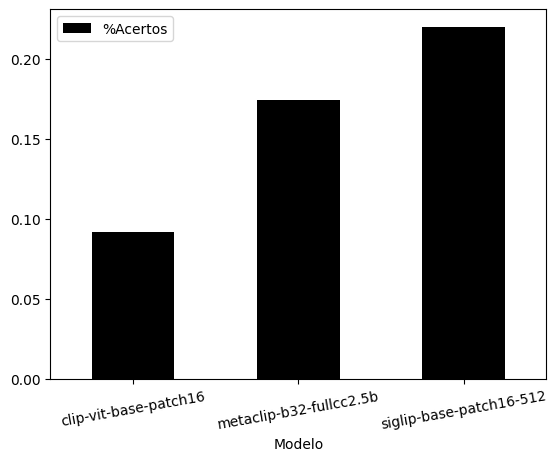

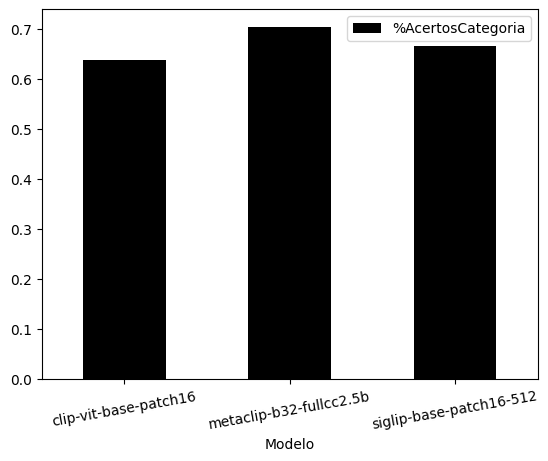

In [ ]:
import pandas as pd

if CREATE_GRAPH:
  df = pd.read_csv(f"{pasta_resultados}output_all.csv")
  graph = df.groupby(['Modelo']).sum().reset_index()[['Modelo', 'Acertos', 'AcertosCategoria']]
  graph["Total"] = df.groupby(['Modelo']).Real.count().values
  graph["%Acertos"] = graph.Acertos / graph.Total
  graph["%AcertosCategoria"] = graph.AcertosCategoria / graph.Total
  display(graph)

  _ = graph.plot(kind='bar', y='%Acertos', x='Modelo', color="black" , rot=10)
  _ = graph.plot(kind='bar', y='%AcertosCategoria', x='Modelo', color="black", rot=10)

,Modelo,Acertos,AcertosCategoria,Total,%Acertos,%AcertosCategoria
0,clip-vit-base-patch16,94,653,1023,9.188661,63.831867
1,metaclip-b32-fullcc2.5b,178,721,1023,17.399804,70.478983
2,siglip-base-patch16-512,225,681,1023,21.994135,66.568915


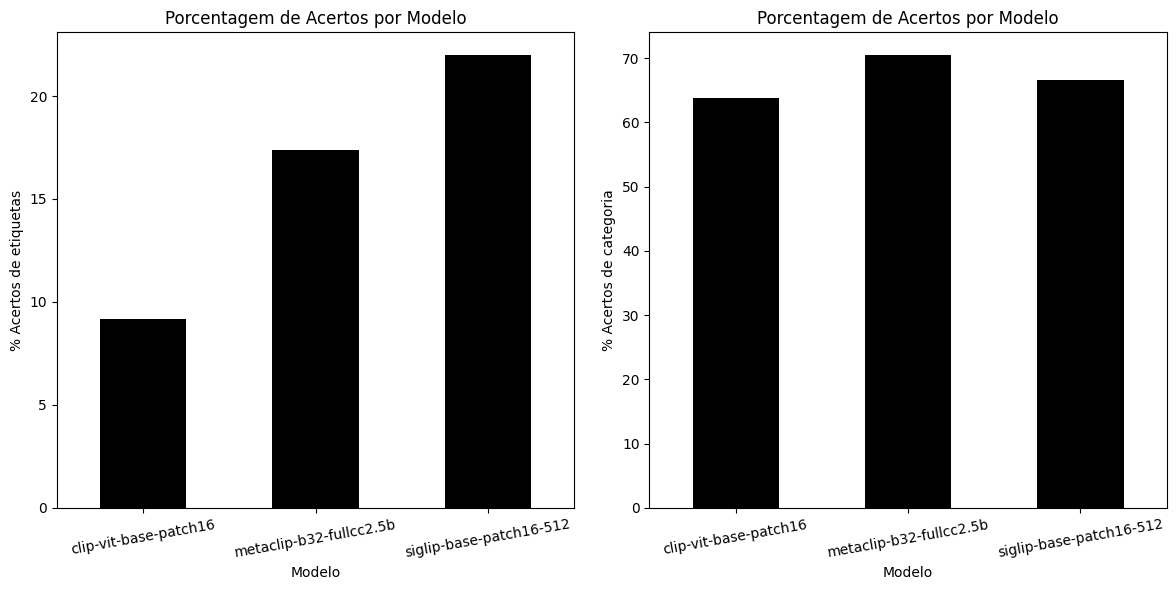

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

if CREATE_GRAPH:
  df = pd.read_csv(f"{pasta_resultados}output_all.csv")
  graph = df.groupby(['Modelo']).sum().reset_index()[['Modelo', 'Acertos', 'AcertosCategoria']]
  graph["Total"] = df.groupby(['Modelo']).Real.count().values
  graph["%Acertos"] = graph.Acertos / graph.Total * 100
  graph["%AcertosCategoria"] = graph.AcertosCategoria / graph.Total * 100
  display(graph)

  # Create a figure and a set of subplots with 1 row and 2 columns
  fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # Adjust figsize as needed

  # Plot the first graph on the first subplot
  graph.plot(kind='bar', y='%Acertos', x='Modelo', color="black" , rot=10, ax=axes[0], legend=False)
  axes[0].set_title('Porcentagem de Acertos por Modelo') # Add title to the first subplot
  axes[0].set_ylabel('% Acertos de etiquetas') # Add y-label to the first subplot
  axes[0].set_xlabel('Modelo') # Add x-label to the first subplot

  # Plot the second graph on the second subplot
  graph.plot(kind='bar', y='%AcertosCategoria', x='Modelo', color="black", rot=10, ax=axes[1], legend=False)
  axes[1].set_title('Porcentagem de Acertos por Modelo') # Add title to the second subplot
  axes[1].set_ylabel('% Acertos de categoria') # Add y-label to the second subplot
  axes[1].set_xlabel('Modelo') # Add x-label to the second subplot

  # Adjust layout to prevent titles/labels from overlapping
  plt.tight_layout()

  plt.show()
